## The Problem Statement & Objective:

### Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. The Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others.

### This is a classification problem , given information about the application we have to predict whether the they’ll be to pay the loan or not.

## Data Dictionary:

#### Loan_ID : Unique Loan ID
#### Gender : Male/ Female
#### Married : Applicant married (Y/N)
#### Dependents : Number of dependents
#### Education : Applicant Education (Graduate/ Under Graduate)
#### Self_Employed : Self employed (Y/N)
#### ApplicantIncome : Applicant income
#### CoapplicantIncome : Coapplicant income
#### LoanAmount : Loan amount in thousands of dollars
#### Loan_Amount_Term : Term of loan in months
#### Credit_History : credit history meets guidelines yes or no
#### Property_Area : Urban/ Semi Urban/ Rural
#### Loan_Status : Loan approved (Y/N) this is the target variable

## Let's import the libraries:

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np

## Load The Data:

In [ ]:
df_train = pd.read_csv('Train_Loan_Prediction.csv')
df_test = pd.read_csv('Test_Loan_Prediction.csv')

## Check the data:

In [ ]:
df_train.shape

(614, 13)

In [ ]:
df_test.shape

(367, 12)

In [ ]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
# Look up for few top rows on the data

df_train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


## Let's Explore The Data...

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Data Cleaning:

## Check for missing values:

In [ ]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Number of attributes having missing values 7


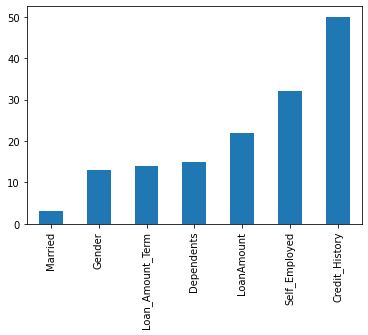

In [ ]:
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
print("Number of attributes having missing values " + str(len(missing)))

## Impute missing values:

 - For numerical variables: imputation using mean or median
 - For categorical variables: imputation using mode

In [ ]:
df_train['Gender'] = df_train['Gender'].fillna(
df_train['Gender'].dropna().mode().values[0] )
df_train['Married'] = df_train['Married'].fillna(
df_train['Married'].dropna().mode().values[0] )
df_train['Dependents'] = df_train['Dependents'].fillna(
df_train['Dependents'].dropna().mode().values[0] )
df_train['Self_Employed'] = df_train['Self_Employed'].fillna(
df_train['Self_Employed'].dropna().mode().values[0] )
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(
df_train['LoanAmount'].dropna().median() )
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(
df_train['Loan_Amount_Term'].dropna().mode().values[0] )
df_train['Credit_History'] = df_train['Credit_History'].fillna(
df_train['Credit_History'].dropna().mode().values[0] )

In [ ]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Checking the numerical columns...

In [ ]:
# to view some basic statistical details like percentile, mean, std etc. of a data frame of numeric values

df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000



We also find that around 84% of applicants have a credit history.
Because the Credit History variable has a mean of 0.85 and either (1 for having a credit history or 0 for not)

## Check for outliers:

#### Let's study the distribution of the numerical variables mainly the Applicant income and the loan amount.

<AxesSubplot:xlabel='ApplicantIncome'>

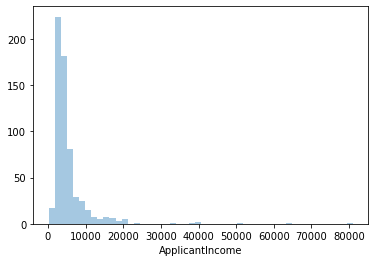

In [ ]:
sns.distplot(df_train.ApplicantIncome,kde=False)

### The data is skewed over here and we can notice there are outliers too...

#### We can remove the outliers but there can be data loss. Instead, we can log transform them because when our original
#### continuous data do not follow the bell curve, we can log transform this data to make it as “normal” as possible
#### so that the statistical analysis results from this data become more valid

Also, there can be cases when applicant may have a low income but CoappliantIncome can have strong income
so we can have a combined Income column as well

In [ ]:
df_train['LoanAmount_log'] =np.log(df_train['LoanAmount'])
df_train['TotalIncome'] = df_train['ApplicantIncome'] + df_train['CoapplicantIncome']
df_train['TotalIncome_log']=np.log(df_train['TotalIncome'])

<AxesSubplot:xlabel='LoanAmount_log'>

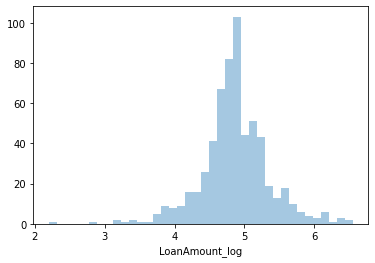

In [ ]:
sns.distplot(df_train.LoanAmount_log,kde=False)

### And, that's a normal distribution...

<AxesSubplot:xlabel='TotalIncome_log'>

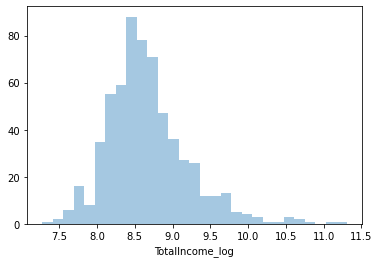

In [ ]:
# similarly we will do for Total_Income as well

sns.distplot(df_train.TotalIncome_log,kde=False)

### Let's explore the data more...

In [ ]:
df_train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
#turn loan status into binary
modified=df_train
modified['Loan_Status']=df_train['Loan_Status'].apply(lambda x: 0 if x=="N" else 1 )
#calculate the mean
modified.groupby('Credit_History').mean()['Loan_Status']

Credit_History
0.0    0.078652
1.0    0.790476
Name: Loan_Status, dtype: float64

<AxesSubplot:xlabel='Credit_History'>

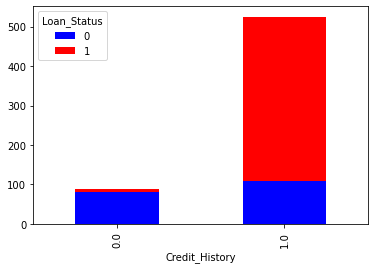

In [ ]:
cred = pd.crosstab(df_train['Credit_History'], df_train['Loan_Status'])
cred.plot(kind='bar', stacked=True, color=['blue','red'], grid=False)

In [ ]:
cred

Loan_Status,0,1
Credit_History,,
0.0,82,7
1.0,110,415


#### We can see that applicants with credit history "Y" have the capability to repay the loan.
#### So, this feature can be said as one of the most significant one.

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

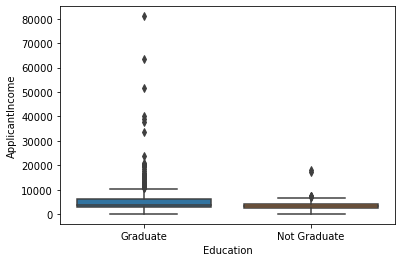

In [ ]:
sns.boxplot(x = 'Education', y = 'ApplicantIncome', data = df_train)

#####  So, people with education have higher income and are likely to pay off the loans more.

### Univariate Analysis:

<AxesSubplot:xlabel='Education', ylabel='count'>

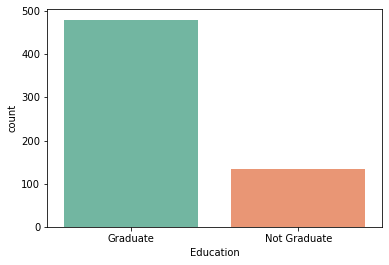

In [ ]:
sns.countplot(x ='Education', data = df_train, palette = "Set2")

### Now, let's visualize each variable separately. Different types of variables are Categorical, ordinal, and numerical.
 - Categorical features: Gender, Married, Self_Employed, Credit_History, Loan_Status
 - Ordinal features: Variables in categorical features having some order involved like Dependents, Education, Property_Area
 - Numerical features: ApplicantIncome, Co-applicantIncome, LoanAmount, Loan_Amount_Term

### Categorical:

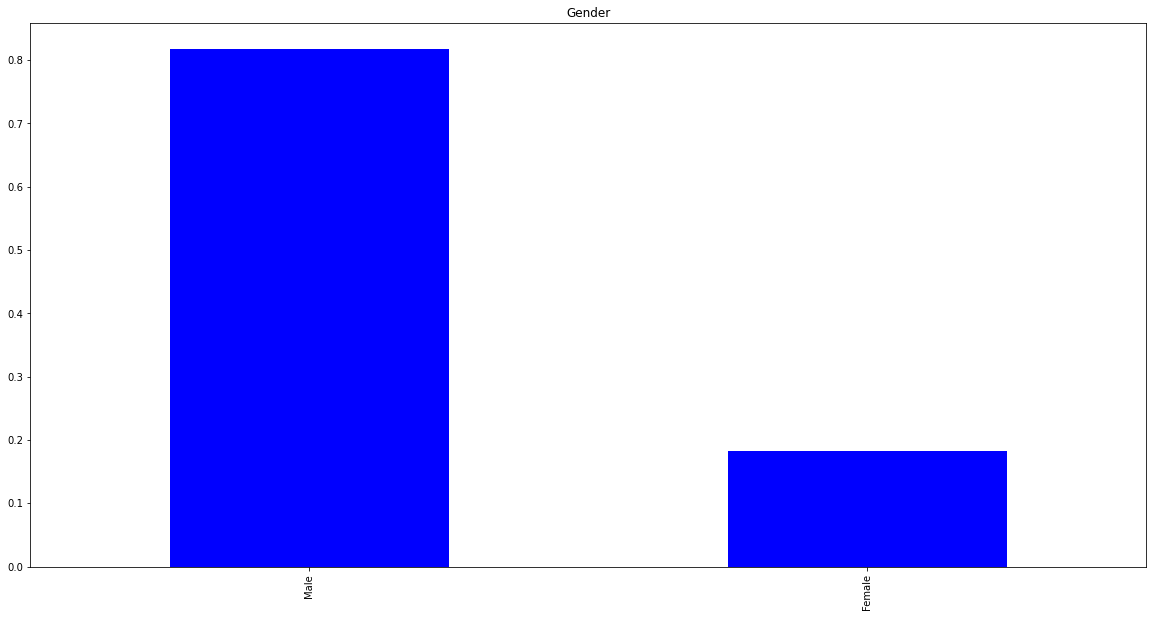

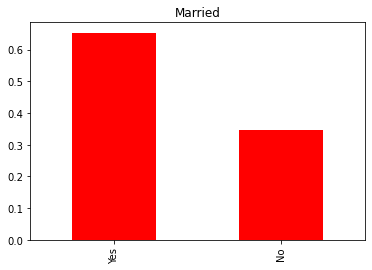

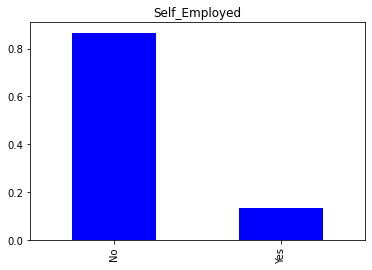

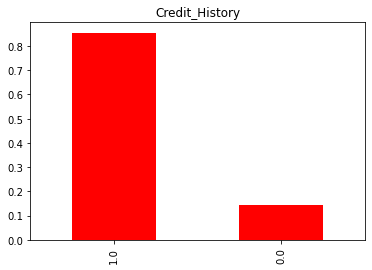

In [ ]:
df_train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender', color= 'blue')
plt.show()

df_train['Married'].value_counts(normalize=True).plot.bar(title= 'Married', color = 'red')
plt.show()

df_train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed' , color ='blue')
plt.show()

df_train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History', color = 'red')
plt.show()

### Insights-
 - 80% of applicants are male.
 - Around 65% of the applicants in the dataset are married.
 - Around 15% of applicants in the dataset are self-employed.
 - Around 85% of applicants have repaid their loans.

### Let's check for Dependents feature

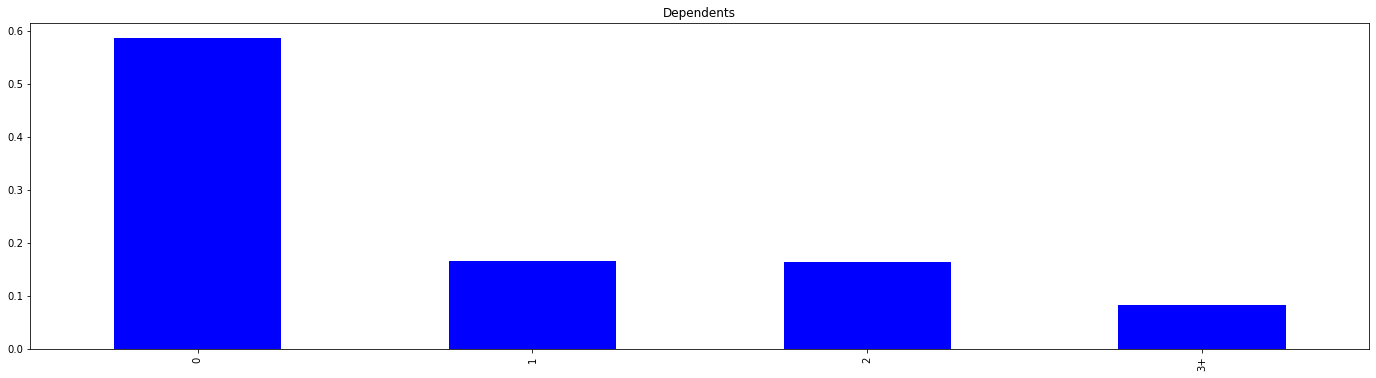

In [ ]:
df_train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents',color = 'blue')
plt.show()

### - Most of the applicants have 0 dependents

### Bi-variate Analysis

 - Here our target variable is Loan Approval or 'Loan_Status'

#### Now Let's form our Hypotheses and test them out-

 - People who have credit history 1 can repay the loans


<AxesSubplot:xlabel='Credit_History', ylabel='Loan_Status'>

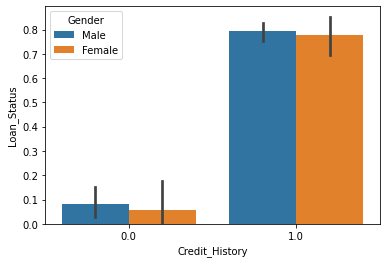

In [ ]:
sns.barplot(x="Credit_History", y="Loan_Status", hue="Gender", data=df_train)

#### Insights- Males who have credit history as 1 are likely to get approvals the most

 - Applicants who have more income will have higher chances to pay off the loan

In [ ]:
#Bin Applicant Income as it is numerical and bar plot won't show us any insight for the same
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
df_train['Income_bin']=pd.cut(df_train['ApplicantIncome'],bins,labels=group)



In [ ]:
# Barplot - Shows approximate values based
# on the height of bars.
Income_bin=pd.crosstab(df_train['Income_bin'],df_train['Loan_Status'])
Income_bin

Loan_Status,0,1
Income_bin,,
Low,34,74
Average,67,159
High,45,98
Very high,46,91


In [ ]:
Income_bin.div(Income_bin.sum(1).astype(float), axis=0)

Loan_Status,0,1
Income_bin,,
Low,0.314815,0.685185
Average,0.296460,0.703540
High,0.314685,0.685315
Very high,0.335766,0.664234


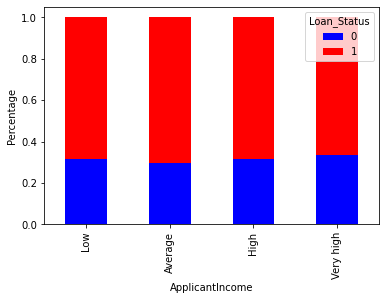

In [ ]:
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,color=['blue','red'])
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

#### The applicant's income has almost no effect on the chances of loan acceptance, which contradicts our prediction that if the applicant's income is large, the chances of loan approval are similarly high.

##### The same way we can check with other variables like Property area or Co-applicant Income or Loan Amount and test out the hypothesis



#### Now, Let's visualise the correlation between out numeric variables

<AxesSubplot:>

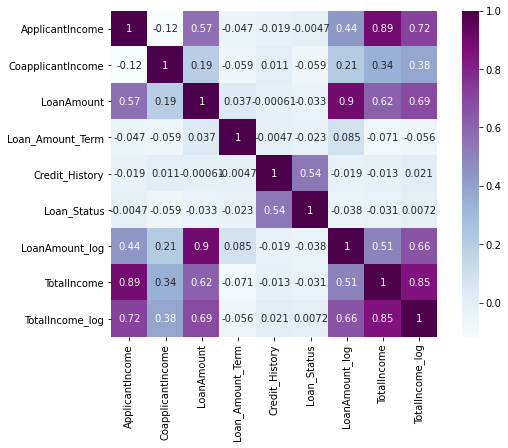

In [ ]:
matrix = df_train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,square=True,cmap="BuPu", annot = True)

#### Insights -
 - ApplicantIncome — LoanAmount
 - Credit_History — Loan_Status
 - LoanAmount-TotalIncome  are strongly co-related.

## Let's start with Modelling now...

### We will build 3 models and then compare their results and choose the optimal one
### The first one being Logistic Regression
### But first Data processing is required...

##### First step, is to remove ID feature as it doesn't signfy anything to our model

In [ ]:
train= df_train.drop('Loan_ID',axis=1)
test= df_test.drop('Loan_ID',axis=1)

##### Second step, is to define our dependent and in-dependent variables

In [ ]:
#Independent Variable
X = train.drop('Loan_Status',1)
#Dependent Variable
y = train.Loan_Status

In [ ]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'LoanAmount_log',
       'TotalIncome', 'TotalIncome_log', 'Income_bin'],
      dtype='object')

In [ ]:
X.drop(columns=['Income_bin','LoanAmount','TotalIncome'],inplace = True)

In [ ]:
test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
test['LoanAmount_log'] =np.log(test['LoanAmount'])
test['TotalIncome'] = test['ApplicantIncome'] + test['CoapplicantIncome']
test['TotalIncome_log']=np.log(test['TotalIncome'])

In [ ]:
test.drop(columns=['LoanAmount','TotalIncome'],inplace = True)

#### Then, we need to convert all categorical columns to numerical ones

In [ ]:
X = pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

#### Now, we will use train dataset to build our model and test dataset to test our model results
#### but we also need to validate the predictions made too, so for that we can split our training data into train and test further

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)

### Time to train our model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(random_state = 1)
model.fit(x_train, y_train)


c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

### Now, let's try to predict on the test set to check how accurate is our model

In [ ]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.7467813131313


#### It's approx 75%

In [ ]:
from sklearn.metrics import confusion_matrix
cnf=confusion_matrix(y_cv, pred_cv)
cnf
#TP FP
#FN TN

array([[ 29,  27],
       [  7, 122]], dtype=int64)

#### Now, to know how our model is going to perform on unseen data we need Validation results.
#### Let's try stratified k-folds cross-validation here

#### What is k-folds validation?

- The whole dataset is randomly split into independent k-folds without replacement.
- k-1 folds are used for the model training and one fold is used for performance evaluation.
- This procedure is repeated k times (iterations) so that we obtain k number of performance estimates (e.g. MSE) for each iteration.
- Then we get the mean of k number of performance estimates (e.g. MSE).

#### And about the word stratified...
 - Stratified k-fold cross-validation is same as just k-fold cross-validation, But in Stratified k-fold cross-validation, it does stratified sampling instead of random sampling.

In [ ]:
from sklearn.model_selection import StratifiedKFold

#### Now, let's start with k=5 folds

In [ ]:
test.isnull().sum()

ApplicantIncome             0
CoapplicantIncome           0
Loan_Amount_Term            6
Credit_History             29
LoanAmount_log              5
TotalIncome_log             0
Gender_Female               0
Gender_Male                 0
Married_No                  0
Married_Yes                 0
Dependents_0                0
Dependents_1                0
Dependents_2                0
Dependents_3+               0
Education_Graduate          0
Education_Not Graduate      0
Self_Employed_No            0
Self_Employed_Yes           0
Property_Area_Rural         0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

In [ ]:
test = test.dropna(axis=0)

In [ ]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1)

for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))

    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]

    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)

    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)

    mean += score #mean=mean+score
    print ('accuracy_score',score)

    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]

print ('\n Mean Validation Accuracy',mean/(i-1))

c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



1 of kfold 5 
accuracy_score 0.8048780487804879

2 of kfold 5 
accuracy_score 0.7804878048780488

3 of kfold 5 
accuracy_score 0.7886178861788617

4 of kfold 5 
accuracy_score 0.8292682926829268

5 of kfold 5 
accuracy_score 0.8032786885245902

 Mean Validation Accuracy 0.801306144208983


c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### So, our mean accuracy is now 80%

#### Let's look at the roc curve

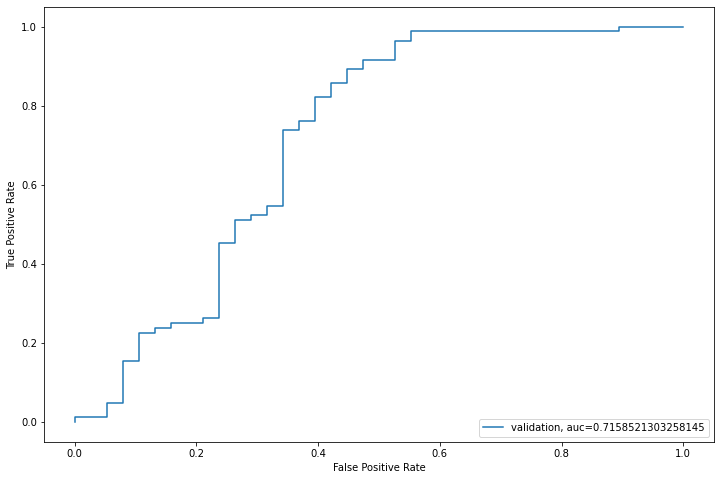

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)

auc = metrics.roc_auc_score(yvl, pred)

plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

#### So, our auc is 0.71

### Now, using Decision Tree

In [ ]:
from sklearn import tree
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]

    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.7398373983739838

2 of kfold 5 
accuracy_score 0.6991869918699187

3 of kfold 5 
accuracy_score 0.7235772357723578

4 of kfold 5 
accuracy_score 0.6991869918699187

5 of kfold 5 
accuracy_score 0.6557377049180327

 Mean Validation Accuracy 0.7035052645608423


### Here, mean accuracy is 70%

### Using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('Accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]

print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
Accuracy_score 0.8130081300813008

2 of kfold 5 
Accuracy_score 0.8455284552845529

3 of kfold 5 
Accuracy_score 0.7967479674796748

4 of kfold 5 
Accuracy_score 0.8211382113821138

5 of kfold 5 
Accuracy_score 0.7950819672131147

 Mean Validation Accuracy 0.8143009462881515


#### It's 81%

#### Now., let's see the most important features...

<AxesSubplot:>

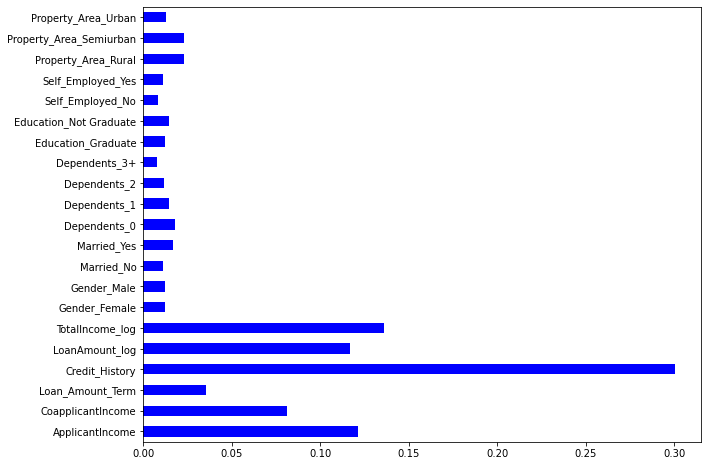

In [ ]:
imp = pd.Series(model.feature_importances_, index=X.columns)
imp.plot(kind='barh', figsize=(10,8), color ='blue')

### So, Credit_History, Loan_Amount, Total_Income are the most important ones here.

In [ ]:
!pip install pycaret[full]


You should consider upgrading via the 'c:\users\acer\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [ ]:
# load dataset
#from pycaret.datasets import get_data
data = train
# init setup
from pycaret.classification import *
s = setup(data, target = 'Loan_Status', session_id = 123)
# train model
lr = create_model('lr')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8140,0.6744,0.9667,0.8056,0.8788,0.4926,0.5327
1,0.7907,0.6872,1.0000,0.7692,0.8696,0.3828,0.4865
2,0.7674,0.6359,0.9667,0.7632,0.8529,0.3323,0.3931
3,0.7674,0.8385,1.0000,0.7500,0.8571,0.2951,0.4160
4,0.8372,0.7000,0.9333,0.8485,0.8889,0.5871,0.5965
5,0.8140,0.8177,0.9655,0.8000,0.8750,0.5235,0.5606
6,0.7907,0.7340,0.9655,0.7778,0.8615,0.4526,0.5002
7,0.8605,0.8350,1.0000,0.8286,0.9062,0.6427,0.6881
8,0.7907,0.7488,1.0000,0.7632,0.8657,0.4284,0.5221
9,0.8810,0.8647,0.9310,0.9000,0.9153,0.7154,0.7166
